In [1]:
#import packages
import pandas as pd
import numpy as np

import math

#import data
Products = pd.read_csv('s3://kevinr/Product.csv')

EndUser = pd.read_csv('s3://kevinr/EndUser.csv')

Invoice = pd.read_csv('s3://kevinr/Invoice.csv')

Vendor = pd.read_csv('s3://kevinr/Vendor.csv')

Invoice




,COUNTRY_CODE,INVOICE_DATE,INVOICE_ID,INVOICE_LINE,PRODUCT_ID,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID
0,UK,07/15/2019,E5ED03155812D08AF95C0DE6C6CFC756,1,74B2CFB8460D047F00CEC531319C7768,3285.863338,6,68D292A10256DB24405C56738F34D976
1,UK,06/06/2019,060AFA0DDB5F61AE58689DE4E1C45F66,1,9A5264F9ED8507F6F31112E24917452D,418.152176,1,4B39A21A1DD7881D4E165B9E90A4B831
2,UK,04/04/2019,95F78CBA7E223D0441DBE5EC9139C534,1,42A3AE06A8DC14FF62FDA90A55292CAA,60.578612,1,BE572735EA42E603C64667A191FAB9F6
3,UK,02/20/2019,14104E4FCCE6B2BF8A3CC8321DC1B5AE,1,F5B5DB9152AEE5BC633DEF60AC30203D,69.704712,6,E781130707853D0407533FC5433CF0BB
4,UK,11/07/2019,1176EAEA7C94F29A0335D9A5EE9D2A0D,1,59343B86E5B56460844F92C4A87ED4D1,566.165348,1,B9B2476B6EBE1C6657CACC1C836BDF6C
...,...,...,...,...,...,...,...,...
1135330,UK,05/21/2020,DAFB3D65054E0D78E303D2E269A4B52C,1,3D160510AF4A24A1BBABDE5CE9865B9A,245.163843,1,8E5AB7C93333C5EEBC8597F3DFA54C08
1135331,UK,04/15/2020,767B314B46D41E34CAB3A78B6729DC2F,1,78696A5B8A3FD20F837FCE6D079409BF,1279.541497,2,289CEEF05EDEB05B2D6FB02D7C20B6D5
1135332,UK,01/10/2019,00DD1AD939D99A27ED1499DFF3550A6D,3,04B44C0CAF14ADC0111482DB4B811742,137.463653,1,21D8D12F4734DE2AC042C99C0ED66C74
1135333,UK,01/11/2019,B8023E9C824731DA8640E9B101CDCD78,4,243B4C9A6C60516C55232D3D21F23C5E,299.060463,5,42E0E9A051C0225F09476491AD02B296


In [2]:
#data

I = Invoice.groupby('END_USER_ID')['UNITE_PRICE_$'].apply(sum)
J = pd.DataFrame({'END_USER_ID':I.index, 'TOTAL_SPENT':I.values})
Invoice = pd.merge(Invoice, J,on='END_USER_ID')

data = pd.merge(Products, Vendor,on='VENDOR_ID')
data = pd.merge(data, Invoice,on='PRODUCT_ID')
data = pd.merge(data, EndUser,on='END_USER_ID')
data

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,TOTAL_SPENT,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.624759e+01,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013
1127006,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.637152e+01,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0
1127007,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1.853544e+03,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004
1127008,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.607494e+01,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007


In [3]:
data['Rating'] = (data['UNITE_PRICE_$'] /data['TOTAL_SPENT']) * 100 

data

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000165
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000377
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000261
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000395
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.000000
1127006,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.000000
1127007,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.000000
1127008,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.000000


In [4]:
ratings = data
ratings["Rating"] = ratings['Rating'].apply(np.ceil)
ratings

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.0
1127006,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.0
1127007,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.0
1127008,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.0


In [5]:
# flip dctionary

def inv(d):
    inv = {v: k for k, v in d.items()}
    return inv

In [6]:
## convert user and ratings to integers

users = ratings['END_USER_ID'].unique()

unProducts = ratings['PRODUCT_ID'].unique()


d1 = dict(enumerate(users.flatten(), 1))
d2 = dict(enumerate(unProducts.flatten(), 1))

usersdict = inv(d1)
prodict = inv(d2)

ratings['END_USER_ID'] = ratings['END_USER_ID'].map(usersdict)

ratings['PRODUCT_ID'] = ratings['PRODUCT_ID'].map(prodict)

In [7]:
ratings1 = ratings.drop_duplicates(subset=['END_USER_ID', 'PRODUCT_ID'])
ratings1

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating
0,0,UK,1,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
1,312,UK,2,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
4,813,UK,3,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
5,1304,UK,4,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
13,1498,UK,5,MULTI BASE 14.1IN BLACK .,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.0
1127006,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.0
1127007,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.0
1127008,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.0


In [8]:
ratings1 = ratings1.reset_index(drop=True)

ratings1

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating
0,0,UK,1,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
1,312,UK,2,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
2,813,UK,3,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
3,1304,UK,4,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
4,1498,UK,5,MULTI BASE 14.1IN BLACK .,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609518,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.0
609519,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.0
609520,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.0
609521,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.0


In [9]:
r = pd.read_csv('s3://kevinr/ratings2.csv')
r

,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,VENDOR_NAME,VENDOR_CAT,VENDOR_SUBCAT,INVOICE_DATE,INVOICE_ID,...,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID,TOTAL_SPENT,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,ANNUAL_SALES,Rating
0,1,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,DICOTA,DICOTA,DICOTA,06/23/2020,CA38801D2E2AB13E2580F659B70239BE,...,59.623758,1,1,3.621332e+07,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",210639038.0,1.0
1,2,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,DICOTA,DICOTA,DICOTA,05/06/2020,1DA8F10C4114AF81CB4B10CF913062E8,...,136.573466,3,1,3.621332e+07,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",210639038.0,1.0
2,3,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,DICOTA,DICOTA,DICOTA,02/12/2020,CC976D8D14BD9332878DB22C7E6448B9,...,20.771532,1,1,3.621332e+07,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",210639038.0,1.0
3,4,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,DICOTA,DICOTA,DICOTA,01/20/2020,5733423536EDE730E19F66D78BA86FEA,...,22.304569,1,1,3.621332e+07,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",210639038.0,1.0
4,5,MULTI BASE 14.1IN BLACK .,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,DICOTA,DICOTA,DICOTA,01/30/2020,78D8FC9B592021B64E087D531A633855,...,13.381863,1,1,3.621332e+07,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",210639038.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609518,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,SEAGATE,SEAGATE,SEAGATE,01/14/2019,95CACE28E7AD8C4DE4335717360D01F4,...,46.247593,1,148459,4.624759e+01,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,125744.0,100.0
609519,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,SEAGATE,SEAGATE,SEAGATE,01/31/2019,D2E743E2DF8C4A9CB1555534B4B3E08D,...,46.371517,1,148460,4.637152e+01,KENT,Services,Educational Services,Elementary And Secondary Schools,NaN,100.0
609520,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,SEAGATE,SEAGATE,SEAGATE,01/30/2019,8AEDD443B0528C8A5BE5EE2AFCA6D227,...,1853.544022,40,148461,1.853544e+03,LONDON,Services,Business Services,Miscellaneous Business Services,NaN,100.0
609521,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,SEAGATE,SEAGATE,SEAGATE,02/04/2019,87B8EE0EA9ACBCE28A5D3EE43B559B67,...,46.074939,1,148462,4.607494e+01,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,619299.0,100.0


In [10]:
r1 = r



In [11]:
rat1 = ratings1[:304750]
rat1

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating
0,0,UK,1,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
1,312,UK,2,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
2,813,UK,3,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
3,1304,UK,4,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
4,1498,UK,5,MULTI BASE 14.1IN BLACK .,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304745,29270,UK,12950,5M CAT6 ORANGE SNAGLESS GIGABIT ETHERNET RJ45 ...,CABLES,NETWORK ETHERNET CAB,06010D621D32E49419833240D39EB125,477,UK,STARTECH,...,38287,UK,RENFREWSHIRE,Manufacturing,Rubber And Miscellaneous Plastics Products,Miscellaneous Plastics Products,UNKNOWN,26088649.0,1993,12.0
304746,31972,UK,5680,7M HIGH SPEED HDMI TO HDMI IN WALL CL3 RATED C...,CABLES,HDMI CABLE,06010D621D32E49419833240D39EB125,477,UK,STARTECH,...,38287,UK,RENFREWSHIRE,Manufacturing,Rubber And Miscellaneous Plastics Products,Miscellaneous Plastics Products,UNKNOWN,26088649.0,1993,12.0
304747,6371,UK,6456,ADVANCE FIT WIRELESS TRACKBALL IN,INPUT DEVICES,MOUSE,47A2EBE97999E21436FA8680F4E559F8,621,UK,ACCO/KENSINGTON,...,38287,UK,RENFREWSHIRE,Manufacturing,Rubber And Miscellaneous Plastics Products,Miscellaneous Plastics Products,UNKNOWN,26088649.0,1993,39.0
304748,22520,UK,6968,RJ11/RJ12/RJ45 CRIMPING TOOL .,CABLES,FIBER OPTIC CABLE,20D9B8328C8465CAFF46E4A0A66AB178,436,UK,TRIPPLITE,...,38287,UK,RENFREWSHIRE,Manufacturing,Rubber And Miscellaneous Plastics Products,Miscellaneous Plastics Products,UNKNOWN,26088649.0,1993,14.0


In [12]:
rat2 = ratings1[304750:457146]
rat2

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating
304750,29278,UK,5640,2M PHONE CHARGE CABLE USB TO THIN MICRO USB CH...,CABLES,USB CABLE,06010D621D32E49419833240D39EB125,477,UK,STARTECH,...,115721,UK,WEST YORKSHIRE,Public Administration,"Justice, Public Order, And Safety",Public Order And Safety,UNKNOWN,97886457.0,2009,1.0
304751,8007,UK,465,TV T23D-10 22.5 IPS 1920 X 1200 1000:1 16:10 6...,DISPLAYS,LCD MONITOR,29B7A630EF63C03B8B5306653404C32B,356,UK,LENOVO,...,115721,UK,WEST YORKSHIRE,Public Administration,"Justice, Public Order, And Safety",Public Order And Safety,UNKNOWN,97886457.0,2009,5.0
304752,23901,UK,818,PROSAFE 5 PORT GIGABIT ETHERNET SWITCH ...,COMMUN/NETWORKING,LAN SWITCH UNMANAGED,C175D3A2F00FB52E8DA252B12DAF1621,101,UK,NETGEAR,...,115721,UK,WEST YORKSHIRE,Public Administration,"Justice, Public Order, And Safety",Public Order And Safety,UNKNOWN,97886457.0,2009,1.0
304753,28750,UK,890,PRIVACY SCREEN 13.3IN WIDESCREEN,DISPLAYS,MONITOR ACCESSORIES,A3163B7935E1D7C8F0FB32ED0CD957E1,650,UK,TARGUS,...,115721,UK,WEST YORKSHIRE,Public Administration,"Justice, Public Order, And Safety",Public Order And Safety,UNKNOWN,97886457.0,2009,1.0
304754,4915,UK,9781,LASERJET MFP M477FDN/27-27PPM 600X600DPI/128 M...,PRINTER/COPIER/FAX,LASER AIO/MFP,95E74678F58D7F04BA7ACA2FBCD36899,643,UK,HP INC.,...,115721,UK,WEST YORKSHIRE,Public Administration,"Justice, Public Order, And Safety",Public Order And Safety,UNKNOWN,97886457.0,2009,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457141,17070,UK,7320,CYAN HIGH (4800 PAGES) VERSALINK C400/C405,CONSUMABLES,COLOR LASER TONER,2139487FDFE1D470BBE9E3DAAD4E0B84,111,UK,XEROX,...,52325,UK,HAMPSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,17509785.0,2003,2.0
457142,25960,UK,10969,MAGENTA HIGH (4800 PAGES) VERSALINK C400/C405,CONSUMABLES,COLOR LASER TONER,2139487FDFE1D470BBE9E3DAAD4E0B84,111,UK,XEROX,...,52325,UK,HAMPSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,17509785.0,2003,2.0
457143,28500,UK,7333,BLACK HIGH (5000 PAGES) VERSALINK C400/C405,CONSUMABLES,TONERS,2139487FDFE1D470BBE9E3DAAD4E0B84,111,UK,XEROX,...,52325,UK,HAMPSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,17509785.0,2003,2.0
457144,24559,UK,4914,XPS 15 9570 CORE I7-8750H 16GB 512GB 15.6IN NO...,COMPUTER SYSTEMS,PORTABLES/NOTEBOOKS,EFDCDE7EDAA76DE673F939B0721475FA,330,UK,DELL EMC,...,52325,UK,HAMPSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,17509785.0,2003,25.0


In [15]:
rat3 = ratings1[457146: ]
rat3

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating
457146,24394,UK,1017,P2419H 24IN NOST 1920X1080 16:9 1000:1 8MS DP/...,DISPLAYS,LCD MONITOR,C111986969B7DDA1FBACBD2C777EB913,328,UK,DELL EMC,...,1662,UK,MANCHESTER,Manufacturing,Furniture And Fixtures,Public Building And Related Furniture,50-99,12817064.0,2010,18.0
457147,7515,UK,2563,16GB USB 3.0 DATATRAVELER I G4 .,MEMORY/PROCESSORS,USB STORAGE MEDIA,3DB52E7809F5BFE4C4CC27984C5EF563,550,UK,KINGSTON,...,1662,UK,MANCHESTER,Manufacturing,Furniture And Fixtures,Public Building And Related Furniture,50-99,12817064.0,2010,81.0
457148,23959,UK,3141,WIRELESS KB+MOUSE-KM636 BLACK ...,INPUT DEVICES,KEYBOARD,EACA9FE8E1F0DD974C6E3DD72A57211A,334,UK,DELL EMC,...,1662,UK,MANCHESTER,Manufacturing,Furniture And Fixtures,Public Building And Related Furniture,50-99,12817064.0,2010,3.0
457149,24394,UK,1017,P2419H 24IN NOST 1920X1080 16:9 1000:1 8MS DP/...,DISPLAYS,LCD MONITOR,C111986969B7DDA1FBACBD2C777EB913,328,UK,DELL EMC,...,98777,UK,LONDON,Services,Educational Services,"Schools And Educational Services, Not Elsewhere",<20,38850.0,2015,15.0
457150,24394,UK,1017,P2419H 24IN NOST 1920X1080 16:9 1000:1 8MS DP/...,DISPLAYS,LCD MONITOR,C111986969B7DDA1FBACBD2C777EB913,328,UK,DELL EMC,...,132459,UK,OXFORDSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",<20,167183.0,2014,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609518,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.0
609519,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.0
609520,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.0
609521,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.0


In [16]:
# get top 250 biggest spending customers in dataset
r1 = r1[:457146]

bs = r1.groupby('END_USER_ID')['TOTAL_SPENT'].unique()
big = pd.DataFrame({'User':bs.index, 'Spent':bs.values})
big = big.sort_values(['Spent'], ascending=False).head(250)

input1 = big.User.tolist()
input1

[15,
 1,
 11,
 24,
 15330,
 15416,
 18,
 283,
 120,
 3,
 10748,
 355,
 108,
 2,
 284,
 156,
 335,
 7049,
 797,
 652,
 2455,
 9154,
 32326,
 31560,
 29382,
 39819,
 33690,
 102,
 43137,
 119,
 121,
 356,
 3710,
 1621,
 11826,
 2150,
 808,
 5140,
 24422,
 123,
 1367,
 13218,
 6854,
 2061,
 1012,
 1499,
 17244,
 197,
 29025,
 750,
 1978,
 6946,
 12,
 661,
 10554,
 8197,
 199,
 26883,
 2658,
 19,
 996,
 2249,
 39948,
 40714,
 30776,
 21572,
 151,
 1366,
 3015,
 40075,
 2897,
 126,
 150,
 20745,
 13004,
 1620,
 1022,
 107,
 3619,
 438,
 97,
 312,
 2716,
 11410,
 3709,
 152,
 1308,
 4746,
 437,
 11946,
 39895,
 6895,
 10436,
 363,
 20,
 39866,
 321,
 269,
 7016,
 13726,
 6536,
 31708,
 10561,
 10890,
 657,
 39864,
 8272,
 502,
 6833,
 40124,
 10572,
 1541,
 25239,
 40010,
 19568,
 5552,
 2898,
 795,
 5515,
 18184,
 39831,
 1537,
 3713,
 8266,
 3916,
 3923,
 5579,
 10456,
 40168,
 28933,
 504,
 798,
 13532,
 31148,
 109,
 263,
 39890,
 8864,
 45047,
 268,
 4752,
 1839,
 39955,
 39826,
 18334,

In [17]:
## evaluate accuracy of model on sample


accuracies = pd.DataFrame({'UserID':input1})


accuracies

,UserID
0,15
1,1
2,11
3,24
4,15330
...,...
245,6990
246,201
247,13872
248,40743


In [18]:
for i, rowi in rat1.iterrows():
    if rowi['END_USER_ID'] in input1:
        rat1.at[i,'Rating']= 0

for i, rowi in rat2.iterrows():
    if rowi['END_USER_ID'] in input1:
        rat2.at[i,'Rating']= 0   

for i, rowi in rat3.iterrows():
    if rowi['END_USER_ID'] in input1:
        rat3.at[i,'Rating']= 0
        
print("done")




/emr/notebook-env/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


done


In [19]:
R_df = rat1.pivot(index = 'END_USER_ID', columns ='PRODUCT_ID', values = 'Rating').fillna(0)
R_df.head()

PRODUCT_ID,1,2,3,4,5,6,7,8,9,10,...,27861,27862,27863,27864,27865,27866,27867,27868,27869,27870
END_USER_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
R_df2 = rat2.pivot(index = 'END_USER_ID', columns ='PRODUCT_ID', values = 'Rating').fillna(0)
R_df2.head()

PRODUCT_ID,196,198,199,200,201,202,203,204,205,206,...,30673,30674,30675,30676,30677,30678,30679,30680,30681,30682
END_USER_ID,,,,,,,,,,,,,,,,,,,,,
17678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dz  = pd.concat([R_df, R_df2]).fillna(0)
dz

PRODUCT_ID,1,2,3,4,5,6,7,8,9,10,...,30673,30674,30675,30676,30677,30678,30679,30680,30681,30682
END_USER_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print('we have',ratings1.shape[0], 'ratings')
print('the number of unique users we have is:', len(ratings1.END_USER_ID.unique()))
print('the number of unique products we have is:', len(ratings1.PRODUCT_ID.unique()))
print("The avg user purchaseed %d products."%ratings1.END_USER_ID.value_counts().mean())
print('The max rating is: %d'%ratings1.Rating.max(),"the min rating is: %d"%ratings1.Rating.min())

we have 609523 ratings
the number of unique users we have is: 148463
the number of unique products we have is: 31924
The avg user purchaseed 4 products.
The max rating is: 100 the min rating is: 0


In [23]:
#run model
R = dz.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [24]:
R_demeaned

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.00332442, -0.00332442, -0.00332442, ..., -0.00332442,
        -0.00332442, -0.00332442],
       [-0.00325924, -0.00325924, -0.00325924, ..., -0.00325924,
        -0.00325924, -0.00325924],
       [-0.00296591, -0.00296591, -0.00296591, ..., -0.00296591,
        -0.00296591, -0.00296591]])

In [25]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)
print("done")

done


In [26]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = dz.columns)
print("done")

done


In [27]:
preds_df

PRODUCT_ID,1,2,3,4,5,6,7,8,9,10,...,30673,30674,30675,30676,30677,30678,30679,30680,30681,30682
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002751,0.002749,0.002753,0.002758,0.002742,0.002756,0.002779,0.002721,0.002981,0.002739,...,0.002719,0.002719,0.002732,0.002726,0.002791,0.002736,0.002720,0.002752,0.002720,0.002764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56407,-0.000900,-0.000857,-0.000199,-0.000048,-0.000890,-0.000630,-0.000818,-0.000455,-0.003097,-0.001266,...,-0.000861,-0.000868,-0.000940,-0.000900,-0.001344,-0.000971,-0.000857,-0.000931,-0.000760,0.177697
56408,-0.000900,-0.000857,-0.000199,-0.000048,-0.000890,-0.000630,-0.000818,-0.000455,-0.003097,-0.001266,...,-0.000861,-0.000868,-0.000940,-0.000900,-0.001344,-0.000971,-0.000857,-0.000931,-0.000760,0.177697
56409,0.003323,0.003328,0.003323,0.003322,0.003321,0.003325,0.003323,0.003323,0.003321,0.003322,...,0.003324,0.003324,0.003327,0.003325,0.003346,0.003329,0.003324,0.003318,0.003323,0.003318
56410,0.003201,0.003241,0.003212,0.003205,0.003205,0.003231,0.003207,0.003203,0.003187,0.003203,...,0.003205,0.003210,0.003233,0.003218,0.003380,0.003245,0.003205,0.003199,0.003202,0.003198


In [28]:
def reccomendtop10(userID):
    user_row_number = userID - 1 # UserID starts at 1, not 0 in matrix
    su = preds_df.iloc[user_row_number].sort_values(ascending=False)
    s = pd.DataFrame({'ProductID':su.index, 'Est_Rating':su.values})
    
    #get products already bout by user
    productsPerUser = ratings1.groupby('END_USER_ID')['PRODUCT_ID'].apply(list)
    PPU = pd.DataFrame({'User':productsPerUser.index, 'Products':productsPerUser.values})
    PPU =  PPU[PPU.User == userID].iloc[0]
    bought = PPU.Products
    
    # remove products already bought
    s = s[~s['ProductID'].isin(bought)]
    
    #reccomend top 5 highest rated in remaining 
    x=print( s.head(10))
    y = print(bought)
    return





In [29]:
# test reccomendation function
reccomendtop10(7)

   ProductID  Est_Rating
0        866    0.186479
1        546    0.161212
2        521    0.134763
3       6139    0.118787
4        420    0.090499
5       1657    0.033876
6        555    0.032318
7       3118    0.021500
8       3381    0.020393
9        960    0.015572
[1, 6, 3363, 868, 4992]


In [30]:
## evaluate accuracy of model on sample


accuracies = pd.DataFrame({'UserID':input1})


accuracies

,UserID
0,15
1,1
2,11
3,24
4,15330
...,...
245,6990
246,201
247,13872
248,40743


In [31]:
# add filter to reccommend based on buisness category to attempt to fix cold start

def getAccuracy2(userID):
    user_row_number = userID - 1 # UserID starts at 1, not 0 in matrix
    su = preds_df.iloc[user_row_number].sort_values(ascending=False)
    s = pd.DataFrame({'ProductID':su.index, 'Est_Rating':su.values})
    
    cat = ratings1[ratings1.END_USER_ID == userID].Business_CAT_LEVEL_3.unique()[0]
    
    productsPerCat = ratings1.groupby('Business_CAT_LEVEL_3')['PRODUCT_ID'].apply(list)
    PPU6 = pd.DataFrame({'Cat':productsPerCat.index, 'Products':productsPerCat.values})
    PPU6 =  PPU6[PPU6.Cat == cat].iloc[0]
    s = s[s.ProductID.isin(PPU6.Products)]
    predictions = s.head(10)
    
    productsPerUser = ratings1.groupby('END_USER_ID')['PRODUCT_ID'].apply(list)
    PPU = pd.DataFrame({'User':productsPerUser.index, 'Products':productsPerUser.values})
    PPU =  PPU[PPU.User == userID].iloc[0]
    count = 0
    for i in predictions.ProductID:
        if i in(PPU.Products):
            print('yes')
            count +=1
    accuracy = count
    print("t")
    return accuracy

In [32]:
accuracies['Accuracy'] = accuracies['UserID'].apply(lambda x: getAccuracy2(x))
accuracies

t
yes
t
t
t
t
yes
t
t
t
t
yes
t
t
t
t
yes
t
t
t
t
yes
t
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
t
t
t
yes
t
t
yes
t
t
yes
t
t
t
yes
yes
yes
yes
yes
yes
yes
yes
t
t
t
t
yes
yes
yes
yes
yes
yes
t
t
yes
t
t
t
t
yes
t
t
yes
t
t
yes
yes
yes
yes
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
yes
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
yes
yes
yes
yes
yes
yes
yes
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
yes
t
t
yes
t
t
yes
t
t
t
t
t
t
t
t
t
yes
yes
t
t
t
yes
yes
yes
yes
yes
yes
yes
t
t
t
t
t
t
yes
yes
yes
t
t
t
t
yes
yes
t
t
t
t
t
t
t
t
t
t
t
yes
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
yes
t
t
t
t
t
t
t
t
t
t
t
t
yes
yes
t
t
t
t
yes
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
yes
yes
t
t
t
yes
yes
yes
t
t
t
yes
yes
yes
yes
yes
yes
yes
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
yes
yes
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t


,UserID,Accuracy
0,15,0
1,1,1
2,11,0
3,24,0
4,15330,0
...,...,...
245,6990,0
246,201,0
247,13872,0
248,40743,0


In [33]:
#avg correct rec
accuracies.Accuracy.mean()

0.38

In [34]:
accuracies.Accuracy.sum()

95

In [35]:
import sys
#!{sys.executable} -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

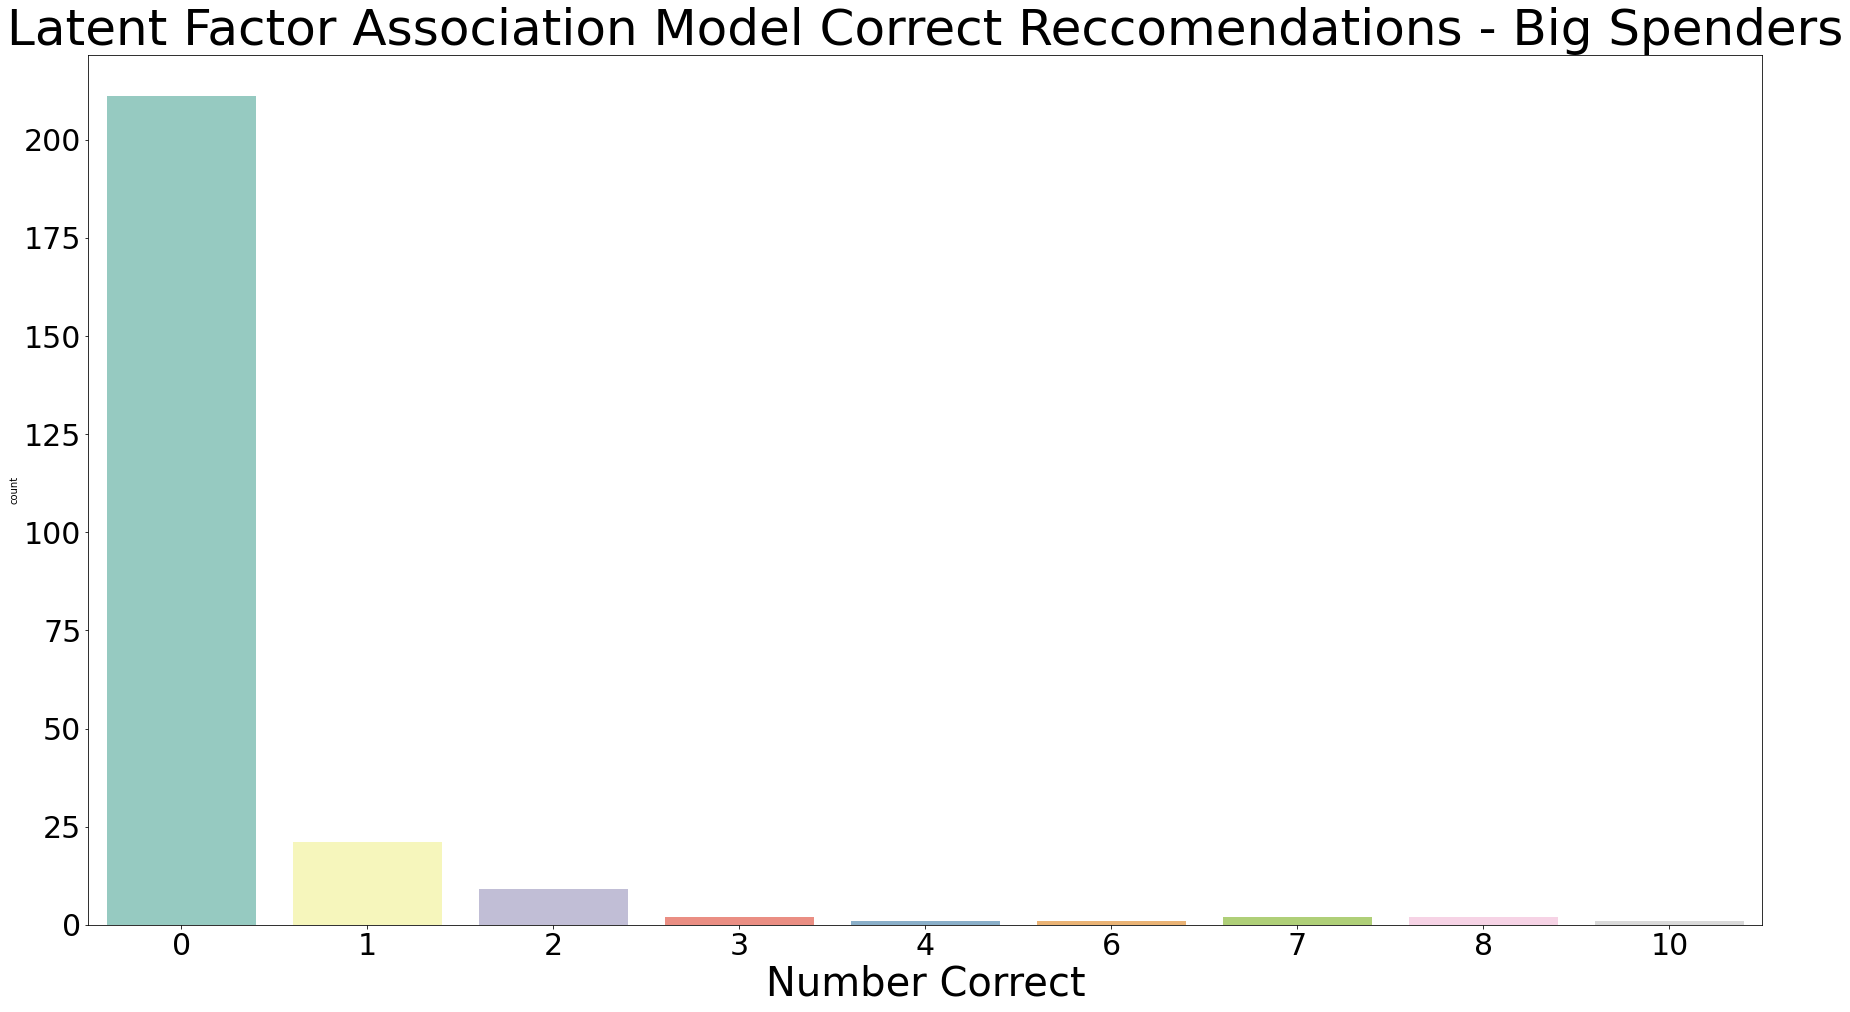

In [36]:

plt.figure(figsize=(30,16))

catcnt = sns.countplot(x="Accuracy", data=accuracies,palette="Set3")
catcnt.axes.set_title("Latent Factor Association Model Correct Reccomendations - Big Spenders",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)